In [1]:
# Display plots in the notebook
%matplotlib inline

In [2]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Digits Sample Data

We'll be using the same dataset we used for the [classification notebook](classification.ipynb) - a dataset of 8x8 pixel handwritten digits such as the following:

![digits](digits.png)

The data is in the form of a 64 element array of integers representing grayscale values for each pixel.  Therefore the data is 64-dimensional.  Often it is useful to be able to reduce the number of dimensions before working with it.

In [3]:
from sklearn.datasets import load_digits

# Load all the samples for all digits 0-9
digits = load_digits()

# Assign the matrices to a variable `data`
data = digits.data

# Assign the labels to a variable `target`
target = digits.target

# Principal Component Analysis

[Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) is a technique used to find vectors, called principal components, in your data along which there is the greatest amount of variance.  Essentially finding the most meaningful differences in the data.  There will be as many principal components as there are dimensions.  But they will be ordered by significance and by only using the first n principal components, the dimensionality of the data can possibly be reduced without losing much information.

scikit-learn gives us the ability to find the principal components of a dataset and then project the data onto those components:

In [4]:
from sklearn.decomposition import PCA

# Create the PCA model
pca = PCA()

# Fit the model to our data and then project the data onto the components
Xproj = pca.fit_transform(data)

To get a better sense of what happened, we can visualize just the first two dimensions of the projected data:

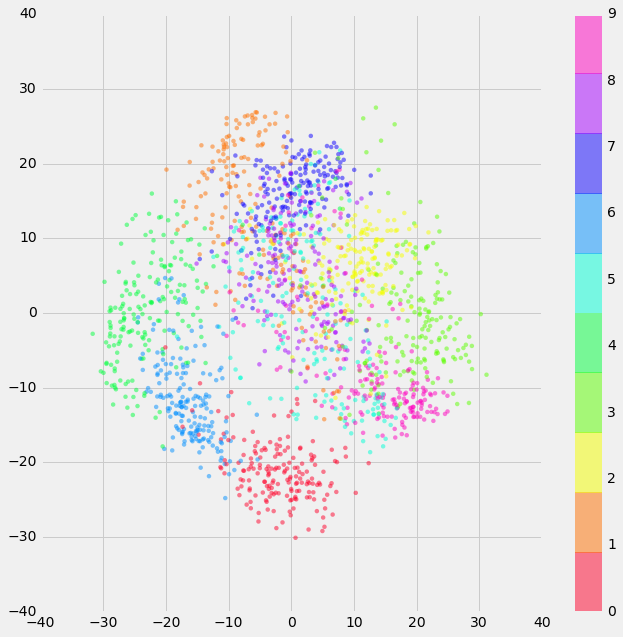

In [5]:
# Create a figure
figure, ax = plt.subplots(figsize=(10,10))

# Scatter the projections of the first and second principal components and color them by their labels
s = ax.scatter(Xproj[:, 0], Xproj[:, 1], c=target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 10))

# Create a colorbar for reference
figure.colorbar(s, ax=ax)

Visually, we can can see fairly distinct clusters of colors.  What this means is that by reducing our 64-dimension feature space down to just 2 dimensions we can still retain a lot of the information.

We can see this another way by seeing how few of the principal components we need to use to distinguish the digits:

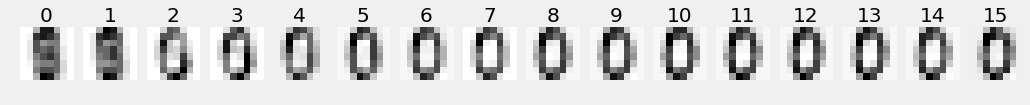

In [6]:
from sklearn.preprocessing import scale

figure, (axs) = plt.subplots(figsize=(16,1), ncols=16)
for i,ax in enumerate(axs):
    # Restore the first i components of the reduced data
    # This involves multiplying the projection by the principal components,
    # adding up the values and then adding the mean for each pixel.
    digit = np.sum(pca.components_[:i] * Xproj[0][:i][:,np.newaxis], axis=0) + pca.mean_
    
    # Show an "image" - a nxn array of values
    ax.imshow(digit.astype(int).reshape((8,8)), interpolation="nearest", cmap="Greys")
    ax.set_axis_off()
    ax.set_title(i)

The above shows a '0' restored using n principal components from n=0 to n=7.  By 2 or 3 principal components the 0 is unmistakebale and by 5 it is getting almost no new information by adding more components.  Therefore we gain very little for using more than the first few components and can work with much fewer than 64 dimensions.

This is also an example of how dimensionality reduction can be used in data compression.

scikit-learn offers a few types of PCA: Kernel PCA, Sparse PCA, Randomized PCA.  For example, using [Kernel PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA):

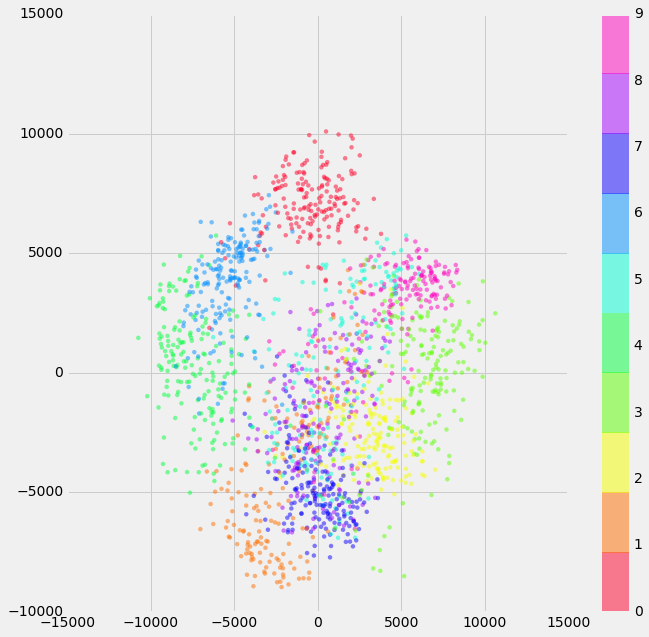

In [7]:
from sklearn.decomposition import KernelPCA

# Create the Kernel PCA model with a 4th degree polynomial kernel, gamma of .009 and coef0 of 120
pca = KernelPCA(kernel='poly', degree=4, gamma=.009, coef0=120)

# Fit the model to our data and then project the data onto the components
Xproj = pca.fit_transform(data)

# Create a figure
figure, ax = plt.subplots(figsize=(10,10))

# Scatter the projections of the first and second principal components and color them by their labels
s = ax.scatter(Xproj[:, 0], Xproj[:, 1], c=target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 10))

# Create a colorbar for reference
figure.colorbar(s, ax=ax)

# PCA + Classification

Dimensionality reduction often might be used before running the classification algorithms discussed in the [classification notebook](classification.ipynb) due to the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).  For example, let's retry using decision trees with just 8 dimensions:

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

# Use the first 8 dimensions of the reduced data to create a train/test split
data_train, data_test, target_train, target_test = train_test_split(
    Xproj[:,:8], target, test_size=.25, random_state=0
)

# Create the model as we did before
model = DecisionTreeClassifier(max_depth=8)

# Fit it to our reduced data
model.fit(data_train, target_train)

# Use the model to predict labels for our training set
pred_train = model.predict(data_train)

# And for the test set
pred_test = model.predict(data_test)

# Print the accuracy for the training set
print("Training Accuracy:", accuracy_score(target_train, pred_train))

# Print the accuracy for the test set
print("Testing Accuracy:", accuracy_score(target_test, pred_test))

Training Accuracy: 0.909428359317
Testing Accuracy: 0.831111111111


For comparison, here is the same thing done on the original data:

In [9]:
# Use the original to create a train/test split
data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=.25, random_state=0
)

# Create the model as we did before
model = DecisionTreeClassifier(max_depth=8)

# Fit it to our reduced data
model.fit(data_train, target_train)

# Use the model to predict labels for our training set
pred_train = model.predict(data_train)

# And for the test set
pred_test = model.predict(data_test)

# Print the accuracy for the training set
print("Training Accuracy:", accuracy_score(target_train, pred_train))

# Print the accuracy for the test set
print("Testing Accuracy:", accuracy_score(target_test, pred_test))

Training Accuracy: 0.928730512249
Testing Accuracy: 0.808888888889


As you can see, the model performs as well or slightly better (less overfitting).

# Further Reading
* [Decomposing signals in components](http://scikit-learn.org/stable/modules/decomposition.html)